## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  12.867313   499.074512  0.123980  5.208309    63.074632
1  40.231145  1693.548175  0.843497  8.847940  1428.985657
2  86.108642   993.421368  0.315235  5.928958   324.749934
3  59.086982   334.589764  0.945671  4.713565   321.880777
4  66.602776   487.716182  0.866729  6.187693   427.767010


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9115622	total: 54.3ms	remaining: 54.2s
1:	learn: 0.9000707	total: 54.9ms	remaining: 27.4s
2:	learn: 0.8900082	total: 55.4ms	remaining: 18.4s
3:	learn: 0.8791024	total: 55.9ms	remaining: 13.9s
4:	learn: 0.8663766	total: 56.4ms	remaining: 11.2s
5:	learn: 0.8579323	total: 56.8ms	remaining: 9.4s
6:	learn: 0.8470707	total: 57.3ms	remaining: 8.13s
7:	learn: 0.8371684	total: 57.9ms	remaining: 7.18s
8:	learn: 0.8263941	total: 58.4ms	remaining: 6.43s
9:	learn: 0.8177075	total: 58.8ms	remaining: 5.82s
10:	learn: 0.8098894	total: 59.2ms	remaining: 5.33s
11:	learn: 0.7990845	total: 59.7ms	remaining: 4.92s
12:	learn: 0.7892113	total: 60.1ms	remaining: 4.56s
13:	learn: 0.7792605	total: 60.5ms	remaining: 4.26s
14:	learn: 0.7705220	total: 60.9ms	remaining: 4s
15:	learn: 0.7611693	total: 61.2ms	remaining: 3.77s
16:	learn: 0.7536212	total: 61.6ms	remaining: 3.56s
17:	learn: 0.7458599	total: 62ms	remaining: 3.38s
18:	learn: 0.7394932	total: 62.5ms	remaining: 3.23

98:	learn: 0.3158269	total: 105ms	remaining: 955ms
99:	learn: 0.3125381	total: 106ms	remaining: 950ms
100:	learn: 0.3097889	total: 106ms	remaining: 942ms
101:	learn: 0.3068497	total: 106ms	remaining: 935ms
102:	learn: 0.3042124	total: 107ms	remaining: 928ms
103:	learn: 0.3017701	total: 107ms	remaining: 922ms
104:	learn: 0.2987156	total: 107ms	remaining: 915ms
105:	learn: 0.2954645	total: 108ms	remaining: 909ms
106:	learn: 0.2921363	total: 108ms	remaining: 904ms
107:	learn: 0.2892887	total: 109ms	remaining: 899ms
108:	learn: 0.2865225	total: 109ms	remaining: 893ms
109:	learn: 0.2829833	total: 110ms	remaining: 888ms
110:	learn: 0.2811362	total: 110ms	remaining: 883ms
111:	learn: 0.2783429	total: 111ms	remaining: 879ms
112:	learn: 0.2758767	total: 111ms	remaining: 874ms
113:	learn: 0.2729945	total: 112ms	remaining: 868ms
114:	learn: 0.2704144	total: 112ms	remaining: 862ms
115:	learn: 0.2675404	total: 112ms	remaining: 856ms
116:	learn: 0.2643646	total: 113ms	remaining: 850ms
117:	learn: 0.

273:	learn: 0.0805282	total: 182ms	remaining: 483ms
274:	learn: 0.0799779	total: 183ms	remaining: 482ms
275:	learn: 0.0793350	total: 184ms	remaining: 481ms
276:	learn: 0.0790019	total: 184ms	remaining: 480ms
277:	learn: 0.0784432	total: 184ms	remaining: 479ms
278:	learn: 0.0779192	total: 185ms	remaining: 477ms
279:	learn: 0.0774820	total: 185ms	remaining: 476ms
280:	learn: 0.0770027	total: 185ms	remaining: 474ms
281:	learn: 0.0765611	total: 186ms	remaining: 473ms
282:	learn: 0.0760809	total: 186ms	remaining: 471ms
283:	learn: 0.0756766	total: 187ms	remaining: 470ms
284:	learn: 0.0752591	total: 187ms	remaining: 469ms
285:	learn: 0.0747665	total: 187ms	remaining: 468ms
286:	learn: 0.0742791	total: 188ms	remaining: 467ms
287:	learn: 0.0740452	total: 188ms	remaining: 465ms
288:	learn: 0.0737955	total: 189ms	remaining: 464ms
289:	learn: 0.0733403	total: 189ms	remaining: 462ms
290:	learn: 0.0729383	total: 189ms	remaining: 461ms
291:	learn: 0.0725035	total: 190ms	remaining: 460ms
292:	learn: 

498:	learn: 0.0265151	total: 283ms	remaining: 284ms
499:	learn: 0.0264003	total: 283ms	remaining: 283ms
500:	learn: 0.0262786	total: 284ms	remaining: 283ms
501:	learn: 0.0261341	total: 284ms	remaining: 282ms
502:	learn: 0.0259524	total: 285ms	remaining: 281ms
503:	learn: 0.0258258	total: 285ms	remaining: 280ms
504:	learn: 0.0256797	total: 285ms	remaining: 280ms
505:	learn: 0.0255040	total: 286ms	remaining: 279ms
506:	learn: 0.0254238	total: 286ms	remaining: 278ms
507:	learn: 0.0252681	total: 286ms	remaining: 277ms
508:	learn: 0.0251277	total: 287ms	remaining: 277ms
509:	learn: 0.0250496	total: 287ms	remaining: 276ms
510:	learn: 0.0249379	total: 288ms	remaining: 275ms
511:	learn: 0.0248010	total: 288ms	remaining: 275ms
512:	learn: 0.0246367	total: 289ms	remaining: 274ms
513:	learn: 0.0244746	total: 289ms	remaining: 273ms
514:	learn: 0.0243998	total: 290ms	remaining: 273ms
515:	learn: 0.0242684	total: 290ms	remaining: 272ms
516:	learn: 0.0241075	total: 290ms	remaining: 271ms
517:	learn: 

666:	learn: 0.0140309	total: 363ms	remaining: 181ms
667:	learn: 0.0140106	total: 363ms	remaining: 181ms
668:	learn: 0.0139905	total: 364ms	remaining: 180ms
669:	learn: 0.0139154	total: 364ms	remaining: 179ms
670:	learn: 0.0138844	total: 365ms	remaining: 179ms
671:	learn: 0.0138648	total: 365ms	remaining: 178ms
672:	learn: 0.0138145	total: 366ms	remaining: 178ms
673:	learn: 0.0137840	total: 366ms	remaining: 177ms
674:	learn: 0.0137649	total: 366ms	remaining: 176ms
675:	learn: 0.0137461	total: 367ms	remaining: 176ms
676:	learn: 0.0137275	total: 367ms	remaining: 175ms
677:	learn: 0.0136515	total: 367ms	remaining: 175ms
678:	learn: 0.0135985	total: 368ms	remaining: 174ms
679:	learn: 0.0135470	total: 368ms	remaining: 173ms
680:	learn: 0.0135058	total: 369ms	remaining: 173ms
681:	learn: 0.0134558	total: 369ms	remaining: 172ms
682:	learn: 0.0134105	total: 370ms	remaining: 172ms
683:	learn: 0.0133434	total: 370ms	remaining: 171ms
684:	learn: 0.0132952	total: 370ms	remaining: 170ms
685:	learn: 

905:	learn: 0.0084807	total: 463ms	remaining: 48ms
906:	learn: 0.0084518	total: 463ms	remaining: 47.5ms
907:	learn: 0.0084467	total: 464ms	remaining: 47ms
908:	learn: 0.0084361	total: 464ms	remaining: 46.4ms
909:	learn: 0.0084305	total: 464ms	remaining: 45.9ms
910:	learn: 0.0083945	total: 465ms	remaining: 45.4ms
911:	learn: 0.0083580	total: 465ms	remaining: 44.9ms
912:	learn: 0.0083528	total: 466ms	remaining: 44.4ms
913:	learn: 0.0083425	total: 466ms	remaining: 43.9ms
914:	learn: 0.0083066	total: 467ms	remaining: 43.4ms
915:	learn: 0.0082791	total: 467ms	remaining: 42.8ms
916:	learn: 0.0082690	total: 468ms	remaining: 42.3ms
917:	learn: 0.0082591	total: 468ms	remaining: 41.8ms
918:	learn: 0.0082493	total: 469ms	remaining: 41.3ms
919:	learn: 0.0082397	total: 469ms	remaining: 40.8ms
920:	learn: 0.0082303	total: 470ms	remaining: 40.3ms
921:	learn: 0.0082201	total: 470ms	remaining: 39.8ms
922:	learn: 0.0082151	total: 471ms	remaining: 39.3ms
923:	learn: 0.0082018	total: 471ms	remaining: 38.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

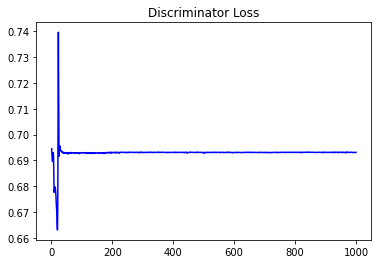

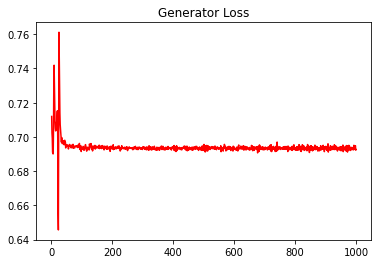

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05372427573905589


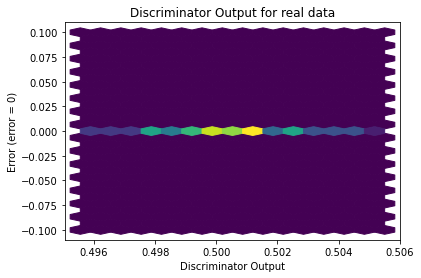

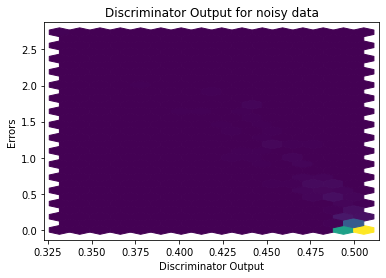

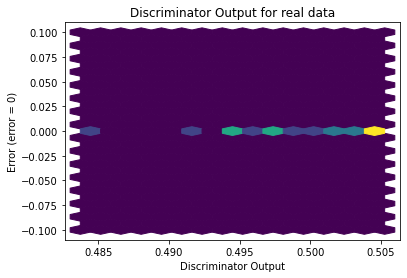

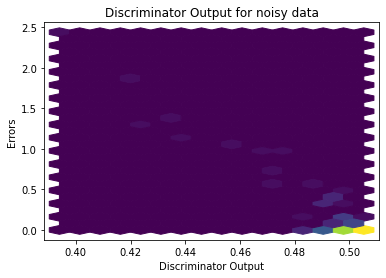

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


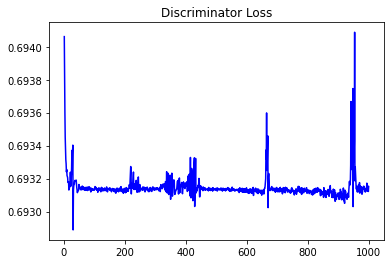

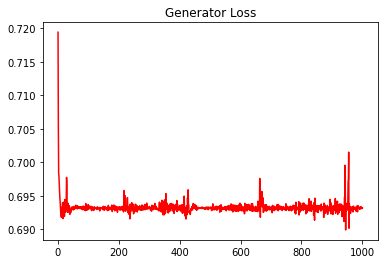

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09455093448903319


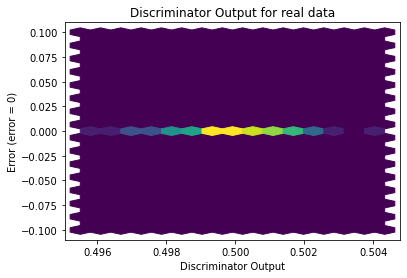

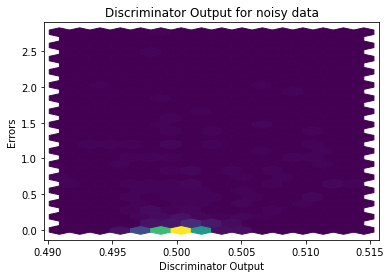

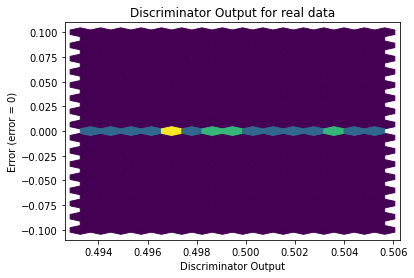

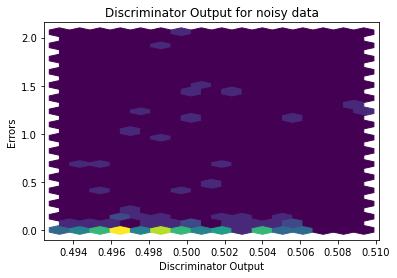

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
